In [6]:
import warnings
warnings.filterwarnings('ignore')

# 로지스틱 회귀

로지스틱(Logistic) 회귀분석은 회귀, 분류 문제에 모두 사용할 수 있다. 

로지스틱 회귀분석 모형에서는 종속변수가 이항분포(binomial)을 따르고 그 모수 $\mu$가 독립변수 $x$에 의존한다고 가정한다.

기존의 회귀 분석에 대한 가정 중 하나는 아래와 같다.

기존의 회귀 분석의 가정은 종속변수 $y$가 $\mu$값이 $x$에 영향을 받는 정규분포를 따른다.

$$기존의 회귀분석 : p(y|x) = \mathcal{N}(w^Tx, \sigma^2)$$

그리고 $y$값은 $-\infty \sim +\infty$까지의 모든 실수가 가능하다.

하지만 로지스틱 회귀분석은 종속변수 $y$가 이항분포를 따른다고 가정하기 때문에 수식을 다음과 같이 나타낼 수 있다.

$$p(y|x) = Bin(y;\mu(x), N)$$

즉, $y$값이 $0 \sim N$까지의 특정한 값을 가지는 것이 가능하다. ex) 영화 평점 0점 ~ 10점

또 다른 방법은 이항분포의 $N=1$인 경우 $y$가 베르누이 확률분포인 경우가 존재한다.

이 경우는 다음과 같은 식으로 표현할 수 있다.

$$p(y|x) = Bern(y;\mu(x))$$

위의 베르누이 분포 역시 $y$가 1일 확률이 $x$에 따라 달라진다.

이 경우 $y$가 1일 확률은 0 ~ 1 사이의 값을 가질 수 있으므로 결국 이진 분류문제가 된다.

$$\begin{split} \hat{y} = \begin{cases} 1 & \text{ if } \mu(x) \geq 0.5 \\ 0 & \text{ if } \mu(x) < 0.5 \end{cases} \end{split}$$

만약 로지스틱 회귀 모형을 회귀 문제에 사용하는 경우 $\hat{y}$로 $\mu$값을 그대로 사용하기도 한다.

$$\hat{y} = y(x)$$

# 시그모이드함수

로지스틱 회귀모델은 베르누의 확률분포의 모수 $\mu$값이 $x$의 어떤 함수라고 가정한다.

즉, $\mu(x)$는 $x$에 대한 함수를 0 ~ 1 사이의 값을 갖도록 하는 **시그모이드함수(sigmoid function)**를 사용해 변형한 것이다.

시그모이드 함수는 종속변수의 모든 실수값에 대해 다음의 조건을 따르는 함수의 집합을 말한다.

1. 유한한 구간 ($a, b$) 사이의 한정된 값을 가진다. $a < f(x) < b$

2. 항상 양의 기울기를 가지는 단조증가의 성격을 가진다. $a > b \rightarrow f(a) > f(b)$

시그모이드 함수는 사실 큰 개념으로 로지스틱함수는 시그모이드함수 중 하나이다.

하지만 일반적으로 시그모이드 함수라고 하면 대부분 로지스틱함수를 의미한다.

- 로지스틱함수(Logistic)

$$Logistic(z) = \sigma(z) = \dfrac{1}{1 + exp^{-z}}$$

- 하이퍼볼릭탄젠트함수(Hyperbolic tangent)

$$\tanh(z) = \frac{\sinh z}{\cosh z} = \frac{(e^z - e^{-z})/2}{(e^z + e^{-z})/2} = 2 \sigma(2z) - 1$$

- 오차함수 (Error)

$$\text{erf}(z) = \frac{2}{\sqrt\pi}\int_0^z e^{-t^2}\,dt$$

하이퍼볼릭탄젠트함수는 딥러닝의 활성화 함수에서 사용되는 개념이며 위의 세 함수를 시각화하면 다음과 같은 차이가 있다.

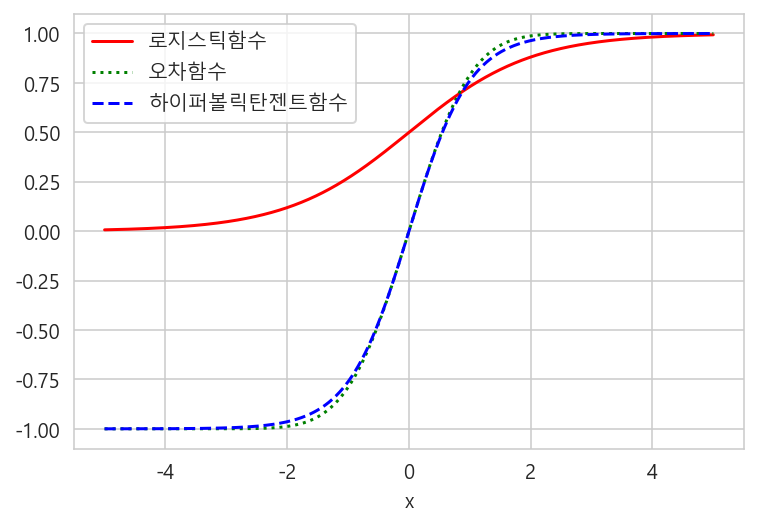

In [4]:
import scipy as sp
sns.set_style('whitegrid')
plt.rcParams["font.family"] = 'Malgun Gothic'

xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

하이퍼볼릭탄젠트함수는 로지스틱함수를 위아래 방향으로 2배 들리고 좌우 방향으로 1/2로 축소한 함수이기에 기울기가 4배 증가된 성격을 가진다.

# 로지스틱함수

로지스틱함수는 음의 무한대부터 양의 무항대까지의 실수값을 0부터 1사이의 실수값으로 변형하는 시그모이드함수이다.

사실 로지스틱함수가 생겨난 과정은 다음과 같다.

1. 베르누이 시행에서 1이 나올 확률 $\mu$와 0이 나올 확률 $1 - \mu$의 비율을 승산비(odds ratio)라고 한다.

$$odds ratio = \dfrac{\mu}{1-\mu}$$

2. $\mu$값은 0부터 1사이의 값을 가지기 때문에 승산비는 0부터 양의 무한대까지의 값을 가지게 된다.

3. 이를 로그 변환하면 로지트함수(Logit function)이 된다.

$$z = logit(odds ratio) = log(\dfrac{\mu}{1-\mu})$$

최종적으로 로지트함수의 값은 로그 변환을 통해 음의 무한대부터 양의 무한대까지의 값을 가질 수 있는데 이의 역함수로 로지스틱 함수가 생겨남으로써 음의 무한대부터 양의 무한대까지의 값을 가지는 입력변수를 0부터 1 사이의 값을 가지는 출력변수로 변환한 것이다.

$$\text{logitstic}(z) = \mu(z) = \dfrac{1}{1+\exp{(-z)}}$$

# 선형 판별함수

로지스틱함수를 사용하면 $z$값과 $\mu$값은 다음의 관계가 성립한다.

- $z = 0$ 일 때, $\mu = 0.5$ 


- $z > 0$ 일 때, $\mu > 0.5 \rightarrow \hat{y} = 1$ 


- $z < 0$ 일 때, $\mu < 0.5 \rightarrow \hat{y} = 0$ 

즉, $z$가 판별함수(decision function)의 역할을 하며 로지스틱 회귀분석에서는 판별함수 수식으로 선형함수를 사용하게 된다.

$$z = w^Tx$$

따라서 판별함수는 직선의 방정식을 따르기 때문에 판별 경계면 또한 선형이 된다.

# StatsModels를 이용한 로지스틱회귀

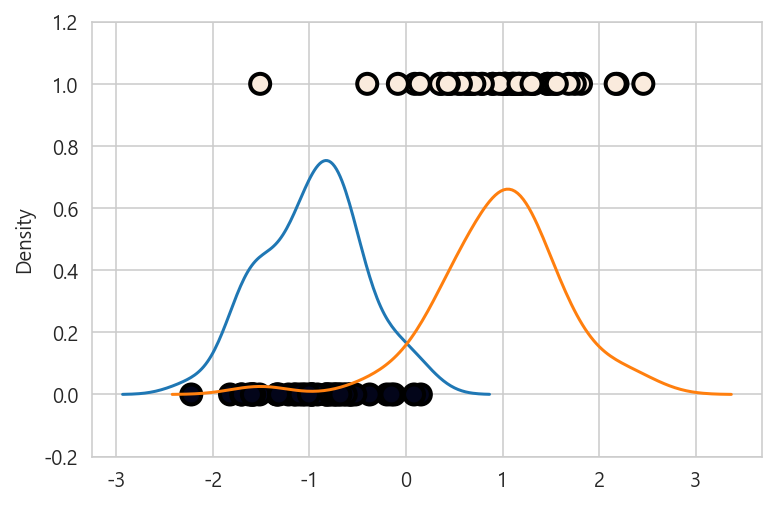

In [7]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [38]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.7679
Time:                        12:47:00   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


- 판별함수식

$$\mu(x) = \sigma(4.2382x + 0.2515)$$

$z$값의 부호를 나누는 기준값은 $ 4.2382x+0.2515=0.5$가 되는 $x$값이다. 

즉, $(0.5−0.2515)/4.2382$ 이다.

하지만 const 항의 유의확률이 0.598로 사실상 0이라고 봐도 무방하기에 다음과 같이 볼 수 있다.

$$\mu(x) = \sigma(4.2382x)$$

In [46]:
0.5 / 4.2382

0.11797461186352697

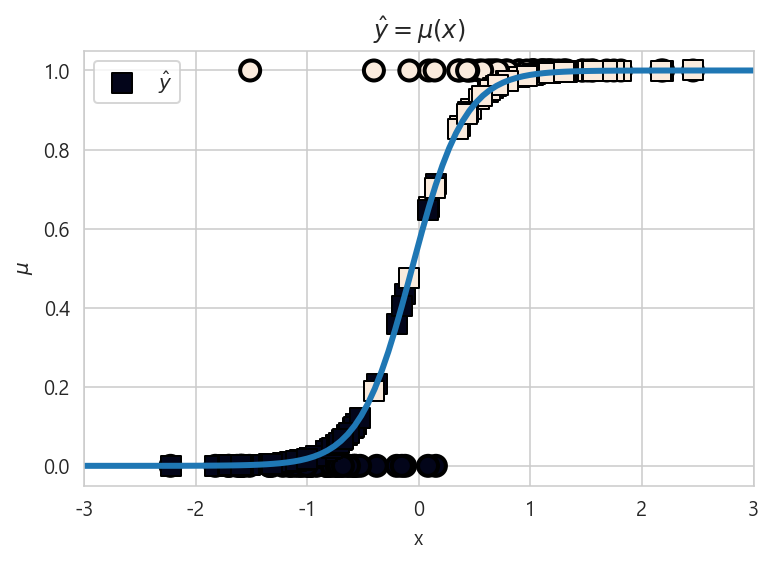

In [45]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

# 판별함수

statsmodels는 decision function 속성이 없어 ROC curve를 그릴 수 없는데 그 대신 fittiedvalues 속성으로 판별함수 $z = w^Tx$값을 확인할 수 있어 이를 이용해 분류문제를 해결할 수 있다.

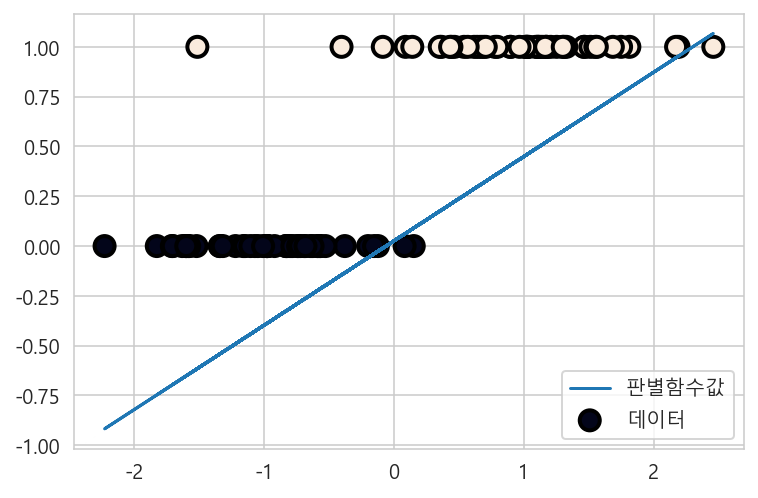

In [48]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

# 로지스틱 회귀 성능

로지스틱회귀 모델의 성능은 맥파든 의사결정계수(McFadden pseudo R square)값으로 측정한다.

$$R^2_{pseudo} = 1 - \dfrac{G^2}{G_0^2}$$

$G^2$는 이탈도(deviance)라고 부르는 값이다.

$$G^2 = 2\sum_{i=1}^N \left( y_i\log\dfrac{y_i}{\hat{y}_i} + (1-y_i)\log\dfrac{1-y_i}{1-\hat{y}_i} \right)$$

위 식에서 $\hat{y}$는 0과 1의 값만 가질 수 있으므로 결국 이는 Logloss를 의미한다.

Logloss란 Cross-Entropy라고도 불리며 모델의 출력값과 정답의 오차를 정의하는 함수이다.

Logloss에 대한 자세한 내용은 따로 다룬다.

따라서 이탈도는 모형이 100% 정확할수록 0에 가까운 값을 가지게 되며 모형의 성능이 나빠질수록 큰 값을 가지게 된다.

$G^2_0$는 귀무모형(Null Model)로 측정한 이탈도를 의미한다.

여기서 귀무모형이란 쓸모없는 모델 즉, $x$에 상관없이 예측하는 모형을 말한다. 즉 무조건부 확률에 따라 $y$를 예측하는 모델이다.

$$\mu_{\text{null}} = \dfrac{\text{number of $Y=1$ data}}{\text{number of all data}}$$

사이킷런을 이용해 logloss를 구할 수 있는데 여기서 normalize를 False로 놓게 되면 이탈도를 구할 수 있다.

In [49]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084355200413036

여기서 귀무 모형의 모수값을 구하면 0.51이며 로그손실을 계산하면 약 69라는 값을 확인할 수 있다.

In [50]:
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [51]:
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

이 두 값을 이용해 구한 맥파든 의사 결정계수는 다음과 같다.

In [52]:
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

In [53]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.7679
Time:                        13:20:01   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


추가적으로 위 Result 결과에서 LLR p-value는 Pseudo R-squ값이 0일 확률 즉, 회귀분석에서의 F-test와 비슷한 맥락의 수치이다.

# Scikit-Learn을 이용한 로지스틱회귀

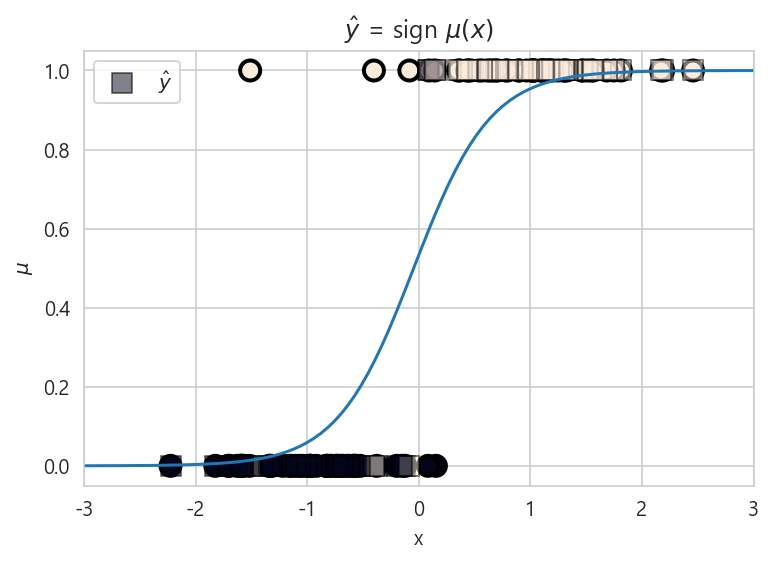

In [54]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()